<a href="https://colab.research.google.com/github/xeqoir/Finance/blob/main/NVIDIA/NVIDIA_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install preliz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 514.2/514.2 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 21.1 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1


In [2]:
import preliz as pz
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import arviz as az
import pymc as pm

In [3]:
url_stockData = "https://raw.githubusercontent.com/xeqoir/Personal/refs/heads/main/NVIDIA/NVDA%20Data%20-%20Sheet1%20(1).csv"
stockData = pd.read_csv(url_stockData)[["Close/Last"]]
stockData

,Close/Last
0,131.60
1,138.07
2,134.80
3,134.81
4,132.65
...,...
61,117.93
62,121.09
63,117.99
64,126.36


Mean:  Close/Last    118.542576
dtype: float64
Median:  Close/Last    118.465
dtype: float64
Mode:      Close/Last
0        98.91
1       100.45
2       102.83
3       103.73
4       104.25
..         ...
61      132.65
62      132.89
63      134.80
64      134.81
65      138.07

[66 rows x 1 columns]


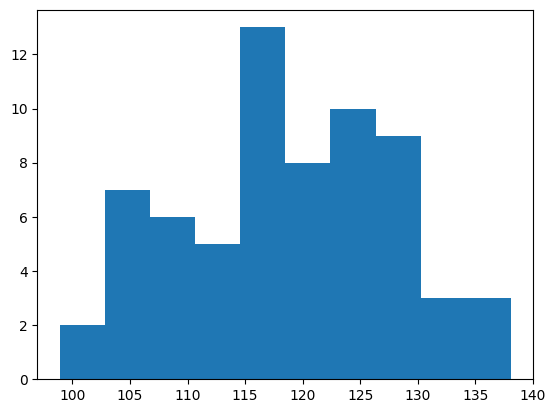

In [4]:
plt.hist(stockData)

mean = stockData[["Close/Last"]].mean()
median = stockData[["Close/Last"]].median()
mode = stockData[["Close/Last"]].mode()

print("Mean: ", mean)
print("Median: ", median)
print("Mode: ", mode) # Doesn't exist, each value is seen once

In [10]:
with pm.Model() as model_stock_SST:
    # mean prior
    # μ = pm.Uniform('μ', lower = 110, upper = 130)
    μ = pm.Normal('μ', mu = 120, sigma = 5)

    # standard deviation prior
    # σ = pm.HalfCauchy('σ', beta = 5)
    σ = pm.HalfNormal('σ', sigma = 5)

    # likelihood
    y = pm.SkewStudentT('y', mu=μ, sigma=σ, a = 1, b = 2.5, observed=stockData)

    idata_stock_SST = pm.sample()

Output()

Output()

Output()

(90.0, 150.0)

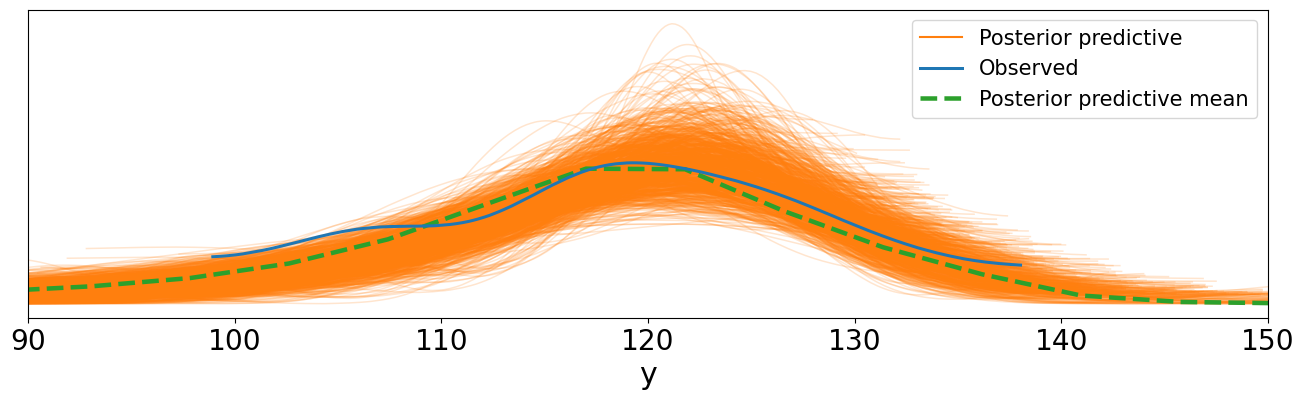

In [11]:
pm.sample_posterior_predictive(idata_stock_SST, model=model_stock_SST, extend_inferencedata=True)
ax = az.plot_ppc(idata_stock_SST, num_pp_samples=1000, figsize=(16, 4), colors=["C1", "C0", "C2"])
ax.set_xlim(90, 150)

array([<Axes: title={'center': 'μ'}>, <Axes: title={'center': 'σ'}>],
      dtype=object)

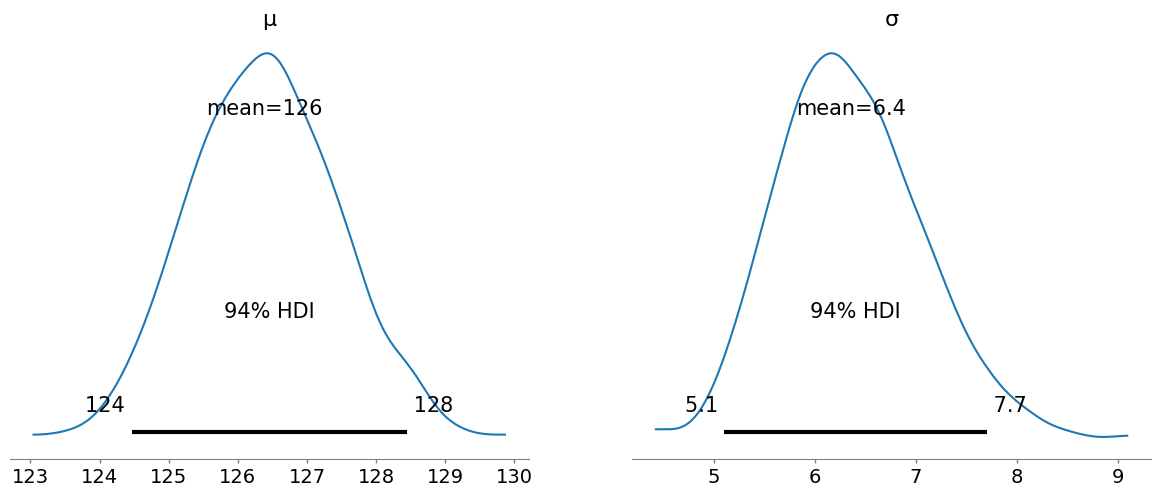

In [12]:
az.plot_posterior(idata_stock_SST)